## 1.训练 / 测试数据集
### 1.1 数据分析

数据集由两部分组成 - 一个用于训练和测试，另一个用于最终独立的精确度测试。它们是在城区选定的区域
训练测试集有268 523个点，占地面积41 379平米。
下一步，我们读入和分析 __Train_Test_Area.csv__ 数据。

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
tt_area = pd.read_csv('data/01.Train_Test_Area.csv', header=0, delimiter=' ')
tt_area.head(10)

,X,Y,Z,R,G,B,PointSourceId,ScanAngleRank,ScanDirectionFlag,NumberOfReturns,ReturnNumber,Intensity,Classification
0,484179.43750,676279.6875,49.340000,124,124,112,101.0,-25.0,1.0,1.0,1.0,64.0,12.0
1,484179.31250,676280.0000,49.320000,124,125,115,101.0,-25.0,1.0,1.0,1.0,60.0,12.0
2,484178.81250,676280.0625,49.310001,123,124,113,101.0,-25.0,1.0,1.0,1.0,62.0,12.0
3,484178.31250,676280.1250,49.340000,122,122,112,101.0,-25.0,1.0,1.0,1.0,64.0,12.0
4,484177.81250,676280.1875,49.320000,122,122,112,101.0,-25.0,1.0,1.0,1.0,70.0,12.0
5,484177.31250,676280.1875,49.320000,125,125,115,101.0,-25.0,1.0,1.0,1.0,63.0,12.0
6,484176.84375,676280.2500,49.310001,124,124,115,101.0,-25.0,1.0,1.0,1.0,63.0,12.0
7,484176.31250,676280.2500,49.340000,125,125,117,101.0,-25.0,1.0,1.0,1.0,57.0,12.0
8,484179.12500,676280.3750,49.310001,124,126,115,101.0,-25.0,1.0,1.0,1.0,54.0,12.0
9,484178.65625,676280.3750,49.320000,128,129,119,101.0,-25.0,1.0,1.0,1.0,58.0,12.0


__LiDAR__ 激光点云每个点的属性定义:

* __X__,__Y__ - 点的平面位置坐标,
* __Z__ - 点的高程数据,
* __R__,__G__,__B__ - 附加的R,G,B颜色值,
* __PointSourceId__ - 采集来源的唯一识别值,
* __ScanAngleRank__ - 扫描斜角,
* __ScanDirectionFlag__ - Direction the laser scanning mirror was traveling at the time of the output laser pulse,
* __NumberOfReturns__ - 回波次数,
* __Intensity__ - 强度,
* __Classification__ - 分类，如地面、植被等。

In [3]:
tt_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268523 entries, 0 to 268522
Data columns (total 13 columns):
X                    268523 non-null float64
Y                    268523 non-null float64
Z                    268523 non-null float64
R                    268523 non-null int64
G                    268523 non-null int64
B                    268523 non-null int64
PointSourceId        268523 non-null float64
ScanAngleRank        268523 non-null float64
ScanDirectionFlag    268523 non-null float64
NumberOfReturns      268523 non-null float64
ReturnNumber         268523 non-null float64
Intensity            268523 non-null float64
Classification       268523 non-null float64
dtypes: float64(10), int64(3)
memory usage: 26.6 MB


In [4]:
tt_area.isnull().sum()

X                    0
Y                    0
Z                    0
R                    0
G                    0
B                    0
PointSourceId        0
ScanAngleRank        0
ScanDirectionFlag    0
NumberOfReturns      0
ReturnNumber         0
Intensity            0
Classification       0
dtype: int64

We can see that there are only numerical features and that there are no null values within all data, so we can proceed with further analysis.
我们看到，只有数值特征，也没有空值。可以做进一步的分析了。

In [5]:
tt_area.nunique()

X                    10099
Y                     3056
Z                     2856
R                      233
G                      225
B                      228
PointSourceId            2
ScanAngleRank           26
ScanDirectionFlag        1
NumberOfReturns          5
ReturnNumber             5
Intensity              205
Classification           8
dtype: int64

In [6]:
tt_area.describe()

,X,Y,Z,R,G,B,PointSourceId,ScanAngleRank,ScanDirectionFlag,NumberOfReturns,ReturnNumber,Intensity,Classification
count,268523.000000,268523.000000,268523.000000,268523.000000,268523.000000,268523.000000,268523.000000,268523.000000,268523.0,268523.000000,268523.000000,268523.000000,268523.000000
mean,484341.568816,676317.380434,54.626213,109.940996,113.993326,99.756259,101.999289,-4.039419,1.0,1.108453,1.054223,78.284032,2.286460
std,86.110618,41.725397,3.993748,39.911418,33.695346,31.141255,0.026661,6.361055,0.0,0.375321,0.256920,27.867723,1.117257
min,484176.312500,676222.937500,48.880001,23.000000,27.000000,28.000000,101.000000,-25.000000,1.0,1.000000,1.000000,8.000000,0.000000
25%,484262.687500,676284.937500,51.970001,83.000000,95.000000,81.000000,102.000000,-10.000000,1.0,1.000000,1.000000,66.000000,2.000000
50%,484350.781250,676317.500000,55.029999,113.000000,117.000000,100.000000,102.000000,-3.000000,1.0,1.000000,1.000000,79.000000,2.000000
75%,484416.625000,676349.625000,55.770000,133.000000,131.000000,113.000000,102.000000,2.000000,1.0,1.000000,1.000000,94.000000,2.000000
max,484499.250000,676414.187500,78.730003,255.000000,255.000000,255.000000,102.000000,8.000000,1.0,5.000000,5.000000,1011.000000,12.000000


下面，我们为后续预测研究特征重要程度。
* 因为 __'PointSourceId'__ and __'ScanDirectionFlag'__ 列只有唯一的一个值，我们确信可以删除它们。
* 另外， __'X'__ and __'Y'__ 坐标对每个点的值都不同，而且与不同空间区域无关也应当删除。

We will use __Univariate Selection__ to confirm our predictions.

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
np.set_printoptions(precision=3)

In [8]:
X = tt_area.iloc[:,0:12]
y = tt_area.iloc[:,12]
X.head(5)

,X,Y,Z,R,G,B,PointSourceId,ScanAngleRank,ScanDirectionFlag,NumberOfReturns,ReturnNumber,Intensity
0,484179.4375,676279.6875,49.340000,124,124,112,101.0,-25.0,1.0,1.0,1.0,64.0
1,484179.3125,676280.0000,49.320000,124,125,115,101.0,-25.0,1.0,1.0,1.0,60.0
2,484178.8125,676280.0625,49.310001,123,124,113,101.0,-25.0,1.0,1.0,1.0,62.0
3,484178.3125,676280.1250,49.340000,122,122,112,101.0,-25.0,1.0,1.0,1.0,64.0
4,484177.8125,676280.1875,49.320000,122,122,112,101.0,-25.0,1.0,1.0,1.0,70.0


In [9]:
X['ScanAngleRank'] = X['ScanAngleRank'].abs() # 单变量特征选择（Univariate Selection）需要正数值
X.head(5)

,X,Y,Z,R,G,B,PointSourceId,ScanAngleRank,ScanDirectionFlag,NumberOfReturns,ReturnNumber,Intensity
0,484179.4375,676279.6875,49.340000,124,124,112,101.0,25.0,1.0,1.0,1.0,64.0
1,484179.3125,676280.0000,49.320000,124,125,115,101.0,25.0,1.0,1.0,1.0,60.0
2,484178.8125,676280.0625,49.310001,123,124,113,101.0,25.0,1.0,1.0,1.0,62.0
3,484178.3125,676280.1250,49.340000,122,122,112,101.0,25.0,1.0,1.0,1.0,64.0
4,484177.8125,676280.1875,49.320000,122,122,112,101.0,25.0,1.0,1.0,1.0,70.0


sklearn中的单变量特征选择
单变量的特征选择是通过基于一些单变量的统计度量方法来选择最好的特征，比如卡方检测等。Scikit-learn 将单变量特征选择的学习器作为实现了 transform方法的对象：

sklearn中实现的方法有:

* SelectKBest 保留评分最高的 K 个特征
* SelectPercentile 保留最高得分百分比之几的特征
* 对每个特征应用常见的单变量统计测试: 假阳性率（false positive rate） SelectFpr, 伪发现率（false discovery rate） SelectFdr , 或者族系误差（family wise error） SelectFwe 。
* GenericUnivariateSelect 允许使用可配置方法来进行单变量特征选择。它允许超参数搜索评估器来选择最好的单变量特征。

这些对象将得分函数作为输入，返回单变量的得分和 p 值 （或者仅仅是 SelectKBest 和 SelectPercentile 的分数）:

* 对于回归: f_regression , mutual_info_regression
* 对于分类: chi2 , f_classif , mutual_info_classif

这些基于 F-test 的方法计算两个随机变量之间的线性相关程度。另一方面，mutual information methods（mutual information : 互信息）能够计算任何种类的统计相关性，但是作为非参数的方法，互信息需要更多的样本来进行准确的估计。

稀疏数据的特征选择

如果你使用的是稀疏的数据 (例如数据可以由稀疏矩阵来表示), 
chi2 , mutual_info_regression , mutual_info_classif 可以处理数据并保持它的稀疏性

In [10]:
# 从12个特征中选择8个，推测可能会去掉前面提到的四个，经典的卡方检验是检验定性自变量对定性因变量的相关性。
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, y)

In [11]:
print(fit.scores_) # 输出12个特征的得分

[1.678e+02 2.203e+00 4.539e+04 1.389e+05 1.236e+05 2.676e+05 1.871e+00
 3.398e+04 0.000e+00 1.325e+04 5.013e+02 7.182e+05]


In [12]:
features = fit.transform(X)
print(features[0:6,:]) # summarize selected features

[[ 49.34 124.   124.   112.    25.     1.     1.    64.  ]
 [ 49.32 124.   125.   115.    25.     1.     1.    60.  ]
 [ 49.31 123.   124.   113.    25.     1.     1.    62.  ]
 [ 49.34 122.   122.   112.    25.     1.     1.    64.  ]
 [ 49.32 122.   122.   112.    25.     1.     1.    70.  ]
 [ 49.32 125.   125.   115.    25.     1.     1.    63.  ]]


8列：Z，R，G，B，扫描倾角，回波数，返回值，强度

我们看到 __'PointSourceId'__ 和 __'ScanDirectionFlag'__ 几乎是空值，并且 __'X'__ 和 __'Y'__ 也不在前8名特征选择得分中。

In [13]:
tt_area.info()
tt_area.drop(['PointSourceId', 'ScanDirectionFlag', 'X', 'Y'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268523 entries, 0 to 268522
Data columns (total 13 columns):
X                    268523 non-null float64
Y                    268523 non-null float64
Z                    268523 non-null float64
R                    268523 non-null int64
G                    268523 non-null int64
B                    268523 non-null int64
PointSourceId        268523 non-null float64
ScanAngleRank        268523 non-null float64
ScanDirectionFlag    268523 non-null float64
NumberOfReturns      268523 non-null float64
ReturnNumber         268523 non-null float64
Intensity            268523 non-null float64
Classification       268523 non-null float64
dtypes: float64(10), int64(3)
memory usage: 26.6 MB


下面分析 __'Classification'__ 特征。

一般的LiDAR数据分类有18种类别代码：
* __0__ / __1__ - 尚未分类 / 未指定,
* __2__ - 地面,
* __3__ / __4__ / __5__ - 低植被 / 中植被 / 高植被,
* __6__ - 建筑,
* __7__ - 噪音,
* __8__ - Model Key,
* __9__ - 水,
* __10__ / __11__ - 铁路 / 道路(表面),
* __12__ - Overlap (保留),
* __13__ / __14__ / __15__ / __16__ - Wire-Guard / Wire-Conductor / Transmission Tower / Wire-Connector
* __17__ - Bridge Deck
* __18__ - High Noise

In [14]:
np.unique(tt_area.Classification, return_counts=True) # 计算每个类别有多少记录

(array([ 0.,  2.,  3.,  4.,  5.,  6.,  7., 12.]),
 array([  9073, 226767,   5630,   2924,  14076,   9859,      3,    191],
       dtype=int64))

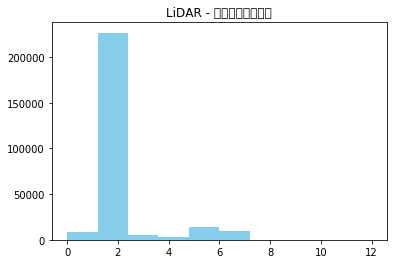

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(tt_area.Classification, color = 'skyblue')

plt.title(u'LiDAR - 点云分类别直方图')

plt.show()

如图所示，极大比例的是地面(2)类别点。这是一个失调的比例，会明显降低性能。另外，也没有1和8以上的类别。

### 1.2 数据采样

对主要类别 - 地面（2）采用 __down-sampling__ ，对其它了别采用 __up-sampling__ , 设置所有类别的采样数量匹配 __5000 features__ 。
针对少数类的向上采样和针对多数类的向下采样都使用来自 https://elitedatascience.com/imbalanced-classes 模式。
首先，我们必须把数据切分成 __train / test__ 数据集，以免干扰后面基于测试数据的模型精确度评估。

关于不平衡类别处理参考文章 https://yq.aliyun.com/articles/226016

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [17]:
X = tt_area.iloc[:,0:8]
X.head(5)

,Z,R,G,B,ScanAngleRank,NumberOfReturns,ReturnNumber,Intensity
0,49.340000,124,124,112,-25.0,1.0,1.0,64.0
1,49.320000,124,125,115,-25.0,1.0,1.0,60.0
2,49.310001,123,124,113,-25.0,1.0,1.0,62.0
3,49.340000,122,122,112,-25.0,1.0,1.0,64.0
4,49.320000,122,122,112,-25.0,1.0,1.0,70.0


In [18]:
y = tt_area.iloc[:,8]
y.head(5)

0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: Classification, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

Next we concatenate our X_train and y_train data in order to handle our imbalanced classes.

In [20]:
tt_area_train = pd.concat([X_train, y_train], axis=1, join='inner')
print(tt_area_train.head(5))

                Z    R    G    B  ScanAngleRank  NumberOfReturns  \
31846   53.119999  121  125  111           -5.0              1.0   
234637  55.770000   37   58   49            1.0              1.0   
202425  54.110001   83  117   92           -5.0              1.0   
185849  54.570000  103  109   85           -5.0              1.0   
105380  56.349998  115  122   89            2.0              2.0   

        ReturnNumber  Intensity  Classification  
31846            1.0      116.0             2.0  
234637           1.0       93.0             2.0  
202425           1.0       59.0             2.0  
185849           1.0       71.0             2.0  
105380           2.0       55.0             2.0  


In [21]:
print(tt_area_train.Classification.value_counts()) # train data imbalanced classes

2.0     151954
5.0       9357
6.0       6605
0.0       6098
3.0       3797
4.0       1961
12.0       135
7.0          3
Name: Classification, dtype: int64


In [22]:
random_state = 123
n_samples = 25000

In [23]:
tt_area_majority_2 = tt_area_train[tt_area_train.Classification==2] # 提取地面特征记录

In [24]:
# 地面点从15万减到2.5万
tt_area_majority_2_upsampled = resample(tt_area_majority_2, 
                                 replace=False,              # 采样替换，采用切片方式；采样数不能超出原来数据表记录数
                                 n_samples=n_samples,        # n_samples chosen for down-sampling
                                 random_state=random_state)  # reproducible results
tt_area_majority_2_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 12498 to 4807
Data columns (total 9 columns):
Z                  25000 non-null float64
R                  25000 non-null int64
G                  25000 non-null int64
B                  25000 non-null int64
ScanAngleRank      25000 non-null float64
NumberOfReturns    25000 non-null float64
ReturnNumber       25000 non-null float64
Intensity          25000 non-null float64
Classification     25000 non-null float64
dtypes: float64(6), int64(3)
memory usage: 1.9 MB


In [25]:
tt_area_minority_0 = tt_area_train[tt_area_train.Classification==0] # extraction of Never classified features
tt_area_minority_3 = tt_area_train[tt_area_train.Classification==3] # extraction of Low Vegetation features
tt_area_minority_4 = tt_area_train[tt_area_train.Classification==4] # extraction of Medium Vegetation features
tt_area_minority_5 = tt_area_train[tt_area_train.Classification==5] # extraction of High Vegetation features
tt_area_minority_6 = tt_area_train[tt_area_train.Classification==6] # extraction of Building features
tt_area_minority_7 = tt_area_train[tt_area_train.Classification==7] # extraction of Noise features
tt_area_minority_12 = tt_area_train[tt_area_train.Classification==12] # extraction of Overlap (Reserved) features

In [26]:
# 少数类增加到与多数类同样的样本数2.5万
tt_area_minority_0_upsampled = resample(tt_area_minority_0, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

tt_area_minority_3_upsampled = resample(tt_area_minority_3, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

tt_area_minority_4_upsampled = resample(tt_area_minority_4, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

tt_area_minority_5_upsampled = resample(tt_area_minority_5, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

tt_area_minority_6_upsampled = resample(tt_area_minority_6, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

tt_area_minority_7_upsampled = resample(tt_area_minority_7, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

tt_area_minority_12_upsampled = resample(tt_area_minority_12, 
                                 replace=True,               # sample with replacement
                                 n_samples=n_samples,        # to match majority class
                                 random_state=random_state)  # reproducible results

现在合并生成采样数据。

In [27]:
tt_area_train_sampled = pd.concat([tt_area_minority_0_upsampled, tt_area_majority_2_upsampled, 
                                     tt_area_minority_3_upsampled, tt_area_minority_4_upsampled, 
                                     tt_area_minority_5_upsampled, tt_area_minority_6_upsampled, 
                                     tt_area_minority_7_upsampled, tt_area_minority_12_upsampled ])

下载训练数据集有了更多观察值，而各个类别的数据比例都是1:1。

In [28]:
tt_area_train_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 41275 to 39
Data columns (total 9 columns):
Z                  200000 non-null float64
R                  200000 non-null int64
G                  200000 non-null int64
B                  200000 non-null int64
ScanAngleRank      200000 non-null float64
NumberOfReturns    200000 non-null float64
ReturnNumber       200000 non-null float64
Intensity          200000 non-null float64
Classification     200000 non-null float64
dtypes: float64(6), int64(3)
memory usage: 15.3 MB


In [29]:
tt_area_train_sampled.Classification.value_counts() # 现在训练数据集有20万个点

7.0     25000
12.0    25000
5.0     25000
6.0     25000
4.0     25000
3.0     25000
2.0     25000
0.0     25000
Name: Classification, dtype: int64

In [30]:
X_train = tt_area_train_sampled.iloc[:, :8] # 特征数据
y_train = tt_area_train_sampled.iloc[:, 8] # 分类数据

In [31]:
# 数据预处理=》无量纲化=》区间缩放法：区间缩放法的思路有多种，常见的一种为利用两个最值进行缩放
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [32]:
X_train = mm.fit_transform(X_train) # 采样之后的全部数据集：训练+测试=》再采样
X_test = mm.fit_transform(X_test) # sklearn最早分出来的测试集
X_test

d:\miniconda3\envs\hm1016\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
d:\miniconda3\envs\hm1016\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.178, 0.617, 0.514, ..., 0.   , 0.   , 0.206],
       [0.233, 0.365, 0.395, ..., 0.   , 0.   , 0.122],
       [0.017, 0.383, 0.373, ..., 0.   , 0.   , 0.126],
       ...,
       [0.203, 0.27 , 0.245, ..., 0.   , 0.   , 0.05 ],
       [0.023, 0.322, 0.455, ..., 0.   , 0.   , 0.156],
       [0.252, 0.1  , 0.127, ..., 0.   , 0.   , 0.147]])

### 1.3 XGBoost - 默认

下面我们采用梯度增强算法的一个高级实现 - __XGBoost__ 。

先用默认设置(we will work only with scaled data from now on).

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
model_xgb = XGBClassifier(tree_method='gpu_hist')
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model_xgb)

Accuracy: 83.04%
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, tree_method='gpu_hist')


In [38]:
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.17%


超过78%的准确度已经不错。不过有5%的准确度下降，可能有过度拟合的问题。


### 1.4 XGBoost - 调参


下面调整XGBoost参数，看能否在训练和测试数据上火的更好的准确度。
文章 https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ 中的内容将作为优化的参考。

需要执行的几个步骤：

1. 选择默认值 __learning rate__ 和 __number of trees__
2. 调整 __max_depth__ 和 __min_child_weight__
3. 调整 __gamma__
4. 调整 __subsample__ 和 __colsample_bytree__
5. 调整 __regularization parameters__
6. 降低 __learning rate__ 和提升 __more trees__

看看更详细的每一步操作方法。

首先，设置默认值：
* learning rate - 0.1   一般情况下，学习速率的值为0.1。
* number of trees - 100,

其它参数优化后，会有什么变化呢？

下面设置 __GridSearchCV__ 为 __5 cross-validation__ ， __max_depth__ 和 __min_child_weight__ as they will most likely have the highest impact on model outcome.

In [40]:
from sklearn.model_selection import GridSearchCV


params = {
    'max_depth':[5,10,20],
    'min_child_weight':[1,3,5]
}

gscv1 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                            colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                                            missing=None, n_estimators=100, n_jobs=1, nthread=None, 
                                            objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1,
                                            scale_pos_weight=1, seed=None, silent=True, subsample=1,tree_method='gpu_hist'),
                                            param_grid = params, cv=5, verbose=100)


gscv1.fit(X_train,y_train)

s = gscv1.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=5, min_child_weight=1 .................................
[CV] .. max_depth=5, min_child_weight=1, score=0.871175, total=  11.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ... max_depth=5, min_child_weight=1, score=0.86995, total=  10.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.1s remaining:    0.0s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ... max_depth=5, min_child_weight=1, score=0.86965, total=  10.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.7s remaining:    0.0s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ... max_depth=5, min_child_weight=1, score=0.87065, total=  10.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

[CV] .. max_depth=20, min_child_weight=3, score=0.98715, total= 1.4min
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 23.3min remaining:    0.0s
[CV] max_depth=20, min_child_weight=3 ................................
[CV] . max_depth=20, min_child_weight=3, score=0.986725, total= 1.5min
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 24.7min remaining:    0.0s
[CV] max_depth=20, min_child_weight=3 ................................
[CV] .. max_depth=20, min_child_weight=3, score=0.98735, total= 1.5min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 26.2min remaining:    0.0s
[CV] max_depth=20, min_child_weight=3 ................................
[CV] .. max_depth=20, min_child_weight=3, score=0.98575, total= 1.4min
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 27.7min remaining:    0.0s
[CV] max_depth=20, min_child_weight=5 ................................
[CV] . max_depth=20, min_child_weight=5, score=0.985725, total= 1.3min
[Parallel(n_jobs=1)]: Done  41 out of  41

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [42]:

s = gscv1.cv_results_.copy()
#s.sort(key= lambda x: x[1],reverse=True)
s

{'mean_fit_time': array([ 10.86 ,  10.3  ,  10.215,  31.019,  28.525,  26.769, 125.869,
         86.837,  74.573]),
 'std_fit_time': array([ 0.416,  0.078,  0.077,  0.56 ,  0.476,  0.458, 11.73 ,  0.471,
         0.47 ]),
 'mean_score_time': array([0.03 , 0.026, 0.025, 0.037, 0.031, 0.039, 0.064, 0.05 , 0.051]),
 'std_score_time': array([0.001, 0.006, 0.003, 0.008, 0.005, 0.007, 0.012, 0.004, 0.006]),
 'param_max_depth': masked_array(data=[5, 5, 5, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'min_child_weight': 1},
  {'max_depth': 5, 'min_child_weight': 3},
  {'max_depth': 5, 'min_child_weight': 5

We see 20 as the optimal value for __max_depth__ and  for __min_child_weight__ and because these are our extreme values we will search for more precise values.

In [ ]:
xgb = XGBClassifier(**gscv1.best_params_,tree_method='gpu_hist')
params = {'max_depth': [20,30,40,50],
         'min_child_weight': [1,2]}
gscv2 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv2.fit(X_train,y_train)
s = gscv2.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

We will go one step deeper once more and look for optimum values for max_depth.

In [ ]:
xgb = XGBClassifier(**gscv2.best_estimator_.get_params())
params = {'max_depth': [50,60,70,80]
         }
gscv3 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv3.fit(X_train,y_train)
s = gscv3.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

We see that picking __50 max_depth__ value was the right way to go. So now we've got the optimum values of __50__ for __max_depth__ and __1__ for __min_child_weight__.

Subsequently we will tune __gamma value__ using the parameters already tuned above.

In [ ]:
xgb = XGBClassifier(**gscv3.best_estimator_.get_params())
params = {'gamma':[0.0,0.1,0.2,0.3,0.4]
          
         }
gscv4 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv4.fit(X_train,y_train)
s = gscv4.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

We've got the optimum value of __0.0__ for __gamma__ parameter.

Next we will tune __subsample__ and __colsample_bytree__ with values 0.6, 0.7, 0.8, 0.9 for both.

In [ ]:
xgb = XGBClassifier(**gscv4.best_estimator_.get_params())
params = {'subsample':[0.6,0.7,0.8,0.9],
         'colsample_bytree':[0.6,0.7,0.8,0.9]

         }
gscv5 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv5.fit(X_train,y_train)
s = gscv5.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

We see that __colsample_bytree__: 0.6 and __subsample__: 0.9 were the most optimum values.

Now we will apply regularization (__reg_alpha, reg_lambda__) to reduce overfitting.

In [ ]:
xgb = XGBClassifier(**gscv5.best_estimator_.get_params())
params = {'reg_alpha':[1e-5, 1e-2, 0, 0.1, 1, 100],
          
        }

gscv6 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv6.fit(X_train,y_train)
s = gscv6.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

We've got an extreme value of 1e-05 so we will do more investigation.

In [ ]:
xgb = XGBClassifier(**gscv6.best_estimator_.get_params())
params = {'reg_alpha':[1e-9, 1e-7, 1e-5, 1e-3]
          
        }

gscv7 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv7.fit(X_train,y_train)
s = gscv7.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

Next we focus on __reg_lambda__.

In [ ]:
xgb = XGBClassifier(**gscv7.best_estimator_.get_params())
params = {'reg_lambda':[1e-5, 1e-2, 0, 0.1, 1, 100],
          
        }

gscv8 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv8.fit(X_train,y_train)
s = gscv8.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

As well as in reg_alpha we've got the extreme value of 1e-05 so we do more searching.

In [ ]:
xgb = XGBClassifier(**gscv8.best_estimator_.get_params())
params = {'reg_lambda':[1e-9, 1e-7, 1e-5, 1e-3]
          
        }

gscv9 = GridSearchCV(param_grid=params, estimator=xgb,cv=5, verbose=100)
gscv9.fit(X_train,y_train)
s = gscv9.grid_scores_.copy()
s.sort(key= lambda x: x[1],reverse=True)
s

We see that __creg_alpha__: 1e-05 and __reg_lambda__: 0.001 were the most optimum values.

Finally we've achieved our optimal XGBoost algorithm.

In [ ]:
print(gscv9.best_estimator_)

Next we should lower the __learning rate__ to 0.01 and add more __trees__ - 1000.

In [ ]:
best_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.6, gamma=0.0, learning_rate=0.01,
                           max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
                           n_estimators=1000, n_jobs=1, nthread=None,
                           objective='multi:softprob', random_state=0, reg_alpha=1e-07,
                           reg_lambda=0.001, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.9)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
y_pred = best_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

A score of over 87%.

Summarizing our tuned XGBoost algorithm got the best score for training and test datasets.

## 2.测试数据集

### 2.1 数据分析

测试区域有46973点云数据，面积9896平米。

In [ ]:
t_area = pd.read_csv('data/01.Test_Area.csv', header=0, delimiter=' ')

In [ ]:
t_area.info()

In [ ]:
t_area.isnull().sum()

We can see that in test area there are also only numerical features and that there are no null values within all data, so we can proceed with further analysis.

In [ ]:
t_area.nunique()

In [ ]:
t_area.describe()

In [ ]:
t_area = t_area.drop(['PointSourceId', 'ScanDirectionFlag', 'X', 'Y'], axis = 1)

In [ ]:
X2 = t_area.iloc[:,0:8]
y2 = t_area.iloc[:,8]

In [ ]:
X2.head(5)

In [ ]:
y2.head(5)

In [ ]:
np.unique(t_area.Classification, return_counts=True)

In [ ]:
plt.hist(t_area.Classification, color = 'skyblue')

plt.title('LiDAR points in each class')

plt.show()

In [ ]:
X2 = mm.fit_transform(X2) #we scale our data as in the first train/test area

### 2.2 XGBoost - default

In [ ]:
y2_pred = model_xgb.predict(X2)
predictions2 = [round(value) for value in y2_pred]
accuracy = accuracy_score(y2, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### 2.3 XGBoost - tuned

In [ ]:
y2_pred = best_model.predict(X2)
predictions2 = [round(value) for value in y2_pred]
accuracy = accuracy_score(y2, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Only 54% ! So summarizing accuracies on X2, y2 test areas were really low in comparisson to X_test and y_test data from train/test area.

We will split our test area dataset to train, test data to see how our optimized XGBoost model works fitted on X2_train, y2_train data.

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.33)
X2_train = mm.fit_transform(X2_train)
X2_test = mm.fit_transform(X2_test)

In [ ]:
best_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.6, gamma=0.0, learning_rate=0.01,
                           max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
                           n_estimators=1000, n_jobs=1, nthread=None,
                           objective='multi:softprob', random_state=0, reg_alpha=1e-07,
                           reg_lambda=0.001, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.9)

best_model.fit(X2_train, y2_train)
y2_pred = best_model.predict(X2_train)
predictions = [round(value) for value in y2_pred]
accuracy = accuracy_score(y2_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

We have achieved perfect score on train test area.

In [ ]:
y2_pred = best_model.predict(X2_test)
predictions = [round(value) for value in y2_pred]
accuracy = accuracy_score(y2_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))t

And almost 95% on test dataset! In conclusion two factors maybe to blame here.

First the chosen features were not optimal and we should try a pick other than __Univariate Selection__.

The second is that we only had one train/test area and our test area may have varied too much to achieve good result. With better hardware capabilities we could have chosen over a dozen of train/test areas and fit combined data into our algorithm.

To wrap things up there will be consecutive notebook __"02. XGBoost for Aerial LiDAR Data Classification with extended training dataset"__ where __XGBoost__ algorithm  will be trained an fit on __6 training areas__.